In [105]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from matplotlib import gridspec
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import pandas as pd
from time import sleep
import plotly.io as pio
from plotly.offline import init_notebook_mode
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit
from hallprobesim_redux import *
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import seaborn as sns

# Combo Fit 

In [109]:
cfg_pickle_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solC_val', save_name='solC_grid_gz9', recreate=False)
cfg_params_Opt  = cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=5, ns_c1=3,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':768},
                                 bs_tuples=((0.25, 0, -4.6),
                                            (0.25, 0, 4.6)),
                                 bs_bounds=(1e-3, 1e-3, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_short_cyl,
                                  cfg_geom_Cole_250mm_cyl_gz9, cfg_params_Opt,
                                  cfg_pickle_Opt, cfg_plot_none)

starting
hpg
init hpg
interpolate?
no
               R     Phi       Z          Br       Bphi          Bz        X  \
0        0.25625  3.1416 -4.5750  -603.78530   16.05317   143.06790 -0.25625   
1        0.25625  3.1416 -4.5625  -993.72460   24.71853    12.93478 -0.25625   
2        0.25625  3.1416 -4.5500 -1868.80800  247.42810 -3563.03400 -0.25625   
3        0.25625  3.1416 -4.5375   740.74890   30.11225   -55.30098 -0.25625   
4        0.25625  3.1416 -4.5250   238.84690   17.44254   157.87970 -0.25625   
...          ...     ...     ...         ...        ...         ...      ...   
3846779  0.25625  0.0000  4.5250   570.49000   37.84981   158.31830  0.25625   
3846780  0.25625  0.0000  4.5375   369.48470   36.16776   185.15020  0.25625   
3846781  0.25625  0.0000  4.5500   245.62180   36.04599   186.65750  0.25625   
3846782  0.25625  0.0000  4.5625   141.69000   36.43867   179.38050  0.25625   
3846783  0.25625  0.0000  4.5750    19.79245   37.45928   160.36320  0.25625   

 

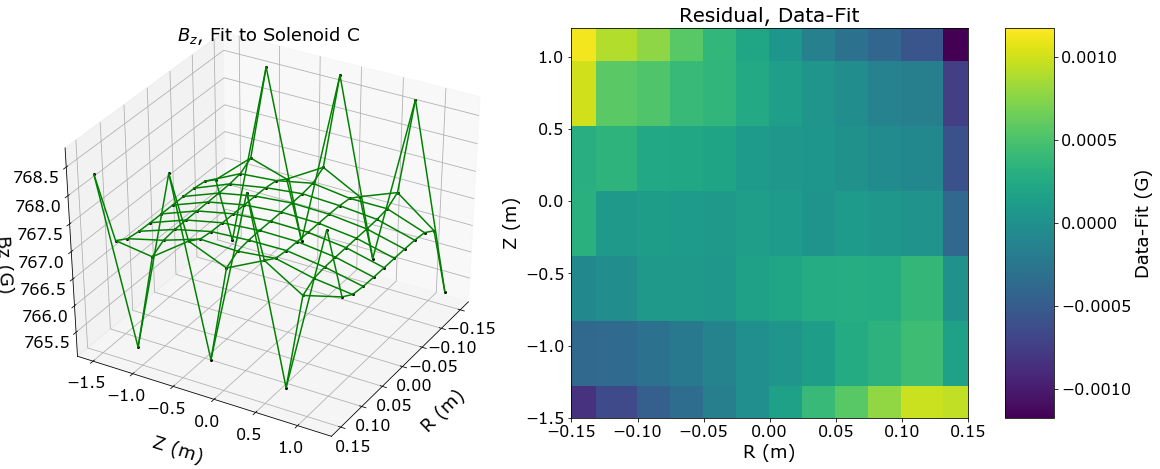

In [110]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bz', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{z}$, Fit to Solenoid C', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/bz_C_fit.png', bbox_inches='tight')

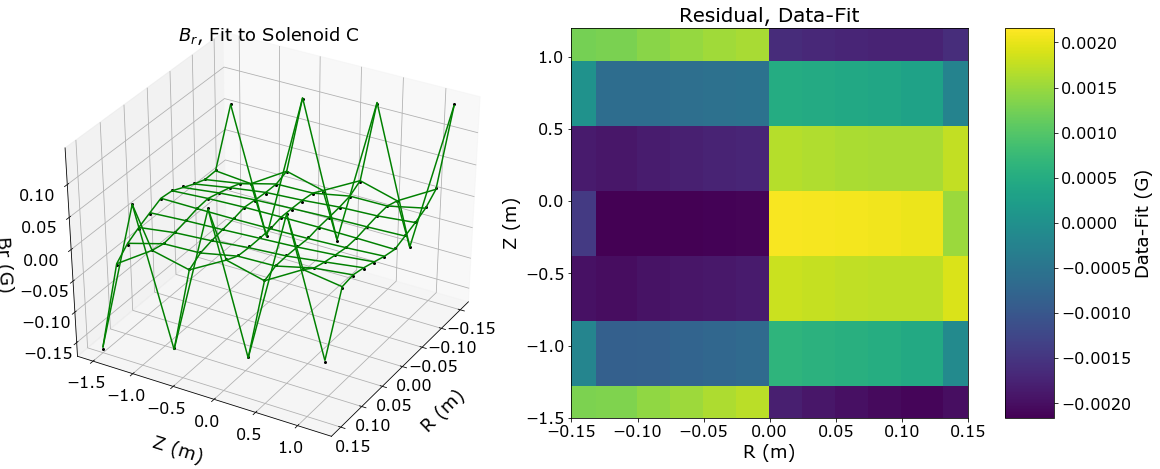

In [111]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Br', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{r}$, Fit to Solenoid C', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/br_C_fit.png', bbox_inches='tight')

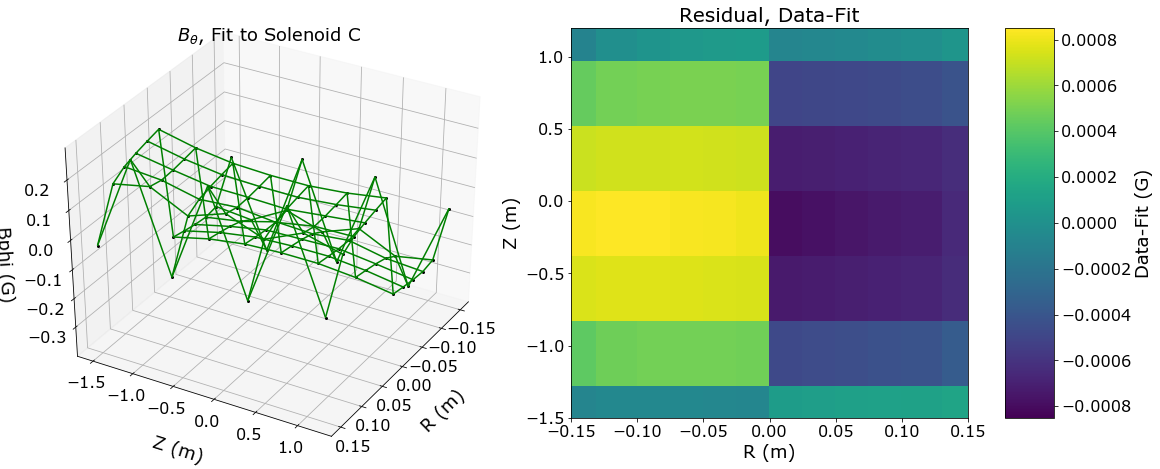

In [112]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bphi', f'R<=0.15 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{\theta}$, Fit to Solenoid C', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/bt_C_fit.png', bbox_inches='tight')

# Validation

In [113]:
grid_list = ['gz9', 'gz3', 'g8', 'nom']
df_dict = {}
for i, grid in enumerate(grid_list):
    if grid == 'nom':
        cfg_pickle_fs = cfg_pickle(use_pickle=False, save_pickle=False,
                                     load_name=f'solC_val', save_name=f'solC_grid_val_{grid}', recreate=True)
        _, ff_fullsim = field_map_analysis(f'fma_fit_solC_syst_{grid}', cfg_data_Cole_250mm_short_cyl,
                                          cfg_geom_Cole_250mm_cyl_hg, cfg_params_Opt,
                                          cfg_pickle_fs, cfg_plot_none)
    else:
        cfg_geom_hg = cfg_geom_Cole_250mm_cyl_hg
        if i == 0:
            cfg_geom_hg._replace(z_steps=z_steps_cole_hg_gz9)
        elif i == 1:
            cfg_geom_hg._replace(z_steps=z_steps_cole_hg_gz3)
        elif i == 2:
            cfg_geom_hg._replace(z_steps=z_steps_cole_hg_g8)
        cfg_pickle_fs = cfg_pickle(use_pickle=False, save_pickle=False,
                                     load_name=f'solC_grid_{grid}', save_name=f'solC_grid_val_{grid}', recreate=True)
        _, ff_fullsim = field_map_analysis(f'fma_fit_solC_syst_{grid}', cfg_data_Cole_250mm_short_cyl,
                                          cfg_geom_hg, cfg_params_Opt,
                                          cfg_pickle_fs, cfg_plot_none)
    df_dict[grid] = ff_fullsim.input_data
    df_dict[grid].eval('Bmag = (Bz**2+Br**2+Bphi**2)**(1/2)', inplace=True)
    df_dict[grid].eval('Bmag_fit = (Bz_fit**2+Br_fit**2+Bphi_fit**2)**(1/2)', inplace=True)

starting
hpg
init hpg
interpolate?
no
               R     Phi       Z          Br       Bphi          Bz        X  \
0        0.25625  3.1416 -4.5750  -603.78530   16.05317   143.06790 -0.25625   
1        0.25625  3.1416 -4.5625  -993.72460   24.71853    12.93478 -0.25625   
2        0.25625  3.1416 -4.5500 -1868.80800  247.42810 -3563.03400 -0.25625   
3        0.25625  3.1416 -4.5375   740.74890   30.11225   -55.30098 -0.25625   
4        0.25625  3.1416 -4.5250   238.84690   17.44254   157.87970 -0.25625   
...          ...     ...     ...         ...        ...         ...      ...   
3846779  0.25625  0.0000  4.5250   570.49000   37.84981   158.31830  0.25625   
3846780  0.25625  0.0000  4.5375   369.48470   36.16776   185.15020  0.25625   
3846781  0.25625  0.0000  4.5500   245.62180   36.04599   186.65750  0.25625   
3846782  0.25625  0.0000  4.5625   141.69000   36.43867   179.38050  0.25625   
3846783  0.25625  0.0000  4.5750    19.79245   37.45928   160.36320  0.25625   

 

starting
hpg
init hpg
interpolate?
no
               R     Phi       Z          Br       Bphi          Bz        X  \
0        0.25625  3.1416 -4.5750  -603.78530   16.05317   143.06790 -0.25625   
1        0.25625  3.1416 -4.5625  -993.72460   24.71853    12.93478 -0.25625   
2        0.25625  3.1416 -4.5500 -1868.80800  247.42810 -3563.03400 -0.25625   
3        0.25625  3.1416 -4.5375   740.74890   30.11225   -55.30098 -0.25625   
4        0.25625  3.1416 -4.5250   238.84690   17.44254   157.87970 -0.25625   
...          ...     ...     ...         ...        ...         ...      ...   
3846779  0.25625  0.0000  4.5250   570.49000   37.84981   158.31830  0.25625   
3846780  0.25625  0.0000  4.5375   369.48470   36.16776   185.15020  0.25625   
3846781  0.25625  0.0000  4.5500   245.62180   36.04599   186.65750  0.25625   
3846782  0.25625  0.0000  4.5625   141.69000   36.43867   179.38050  0.25625   
3846783  0.25625  0.0000  4.5750    19.79245   37.45928   160.36320  0.25625   

 

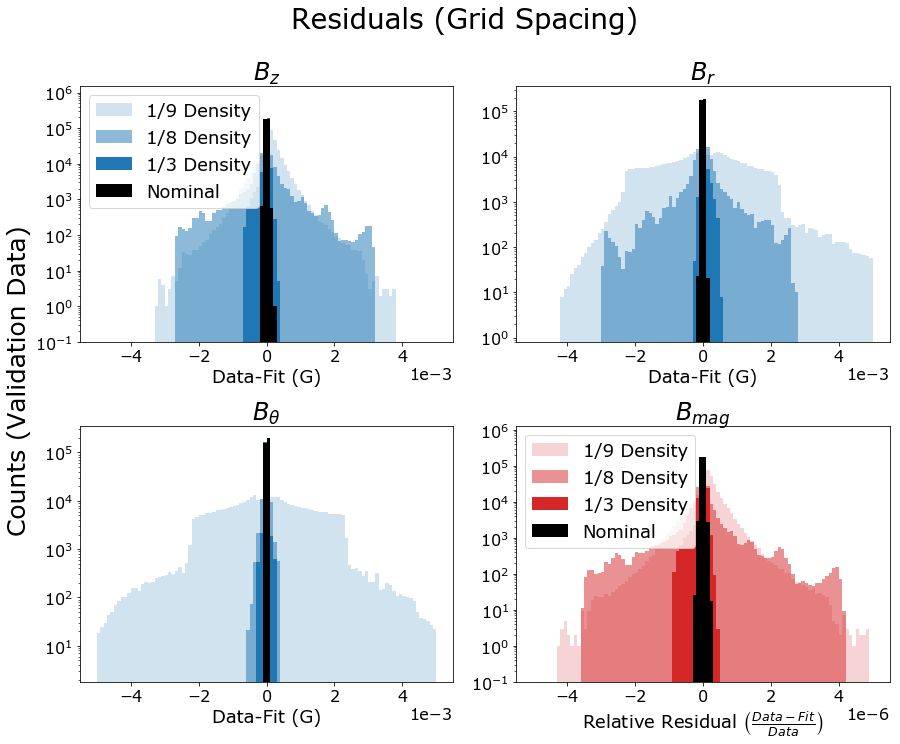

In [123]:
mag_means = []
mag_std = []
grid_list = ['gz9', 'g8', 'gz3', 'nom']
alphas = [0.2, 0.5, 1, 1]
labels = [r'1/9 Density',
          r'1/8 Density',
          r'1/3 Density',
          r'Nominal']
cs = ['C0', 'C1', 'C2', 'k']
          
          
fig, axs = plt.subplots(2, 2, figsize=(12,10), constrained_layout=True)
for i, grid in enumerate(grid_list):
    if i == 3:
        c_comp = 'k'
        c_mag = 'k'
        bins=100
    else:
        c_comp = 'C0'
        c_mag = 'C3'
        bins=100
        
    #fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
    #ax = fig.add_subplot(2, 2, 1)
    _ = splt.hist((df_dict[grid].Bz-df_dict[grid].Bz_fit), ax=axs[0][0], bins=bins, log=True, alpha=alphas[i], label=labels[i], color=c_comp, range=(-5e-3, 5e-3))
    axs[0][0].set_title(r'$B_z$', fontsize=24)
    #axs[0][0].set_ylabel('Counts')
    axs[0][0].set_xlabel('Data-Fit (G)')
    axs[0][0].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
    _ = splt.hist((df_dict[grid].Br-df_dict[grid].Br_fit), ax=axs[0][1], bins=bins, log=True, color=c_comp, alpha=alphas[i], range=(-5e-3, 5e-3))
    axs[0][1].set_title(r'$B_r$', fontsize=24)
    axs[0][1].set_xlabel('Data-Fit (G)')
    axs[0][1].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
    _ = splt.hist((df_dict[grid].Bphi-df_dict[grid].Bphi_fit), ax=axs[1][0], bins=bins, log=True, color=c_comp, alpha=alphas[i], range=(-5e-3, 5e-3))
    axs[1][0].set_title(r'$B_{\theta}$', fontsize=24)
    axs[1][0].set_xlabel('Data-Fit (G)')
    axs[1][0].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
    _ = splt.hist((df_dict[grid].Bmag-df_dict[grid].Bmag_fit)/df_dict[grid].Bmag, ax=axs[1][1], bins=bins, log=True,
                  color=c_mag, alpha=alphas[i], label=labels[i], range=(-5e-6,5e-6))
    mag_means.append(np.mean((df_dict[grid].Bmag-df_dict[grid].Bmag_fit)))
    mag_std.append(np.std((df_dict[grid].Bmag-df_dict[grid].Bmag_fit)))
    axs[1][1].set_title(r'$B_{mag}$', fontsize=24)
    axs[1][1].set_xlabel(r'Relative Residual $\left(\frac{Data-Fit}{Data}\right)$')
    axs[1][1].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
ylim = axs[0][0].get_ylim()
axs[0][0].set_ylim(ylim[0], ylim[1]*10)
ylim = axs[0][1].get_ylim()
axs[0][1].set_ylim(ylim[0], ylim[1]*20)
ylim = axs[1][0].get_ylim()
axs[1][0].set_ylim(ylim[0], ylim[1]*20)
ylim = axs[1][1].get_ylim()
axs[1][1].set_ylim(ylim[0], ylim[1]*10)
axs[0][0].legend(loc='upper left')
axs[1][1].legend(loc='upper left')

fig.suptitle('Residuals (Grid Spacing)', verticalalignment='bottom', fontsize=28)
fig.text(-0.015,0.5, "Counts (Validation Data)", ha="center", va="center", rotation=90, fontsize=25)
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solC.pdf', bbox_inches='tight')
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solA_cyl.pdf', bbox_inches='tight')

# fig = plt.figure(figsize=plt.figaspect(0.3), constrained_layout=False)
# fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
# ax = fig.add_subplot(1, 3, 1)
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
# _ = splt.hist((df_fs.Bz-df_fs.Bz_fit), ax=ax, bins=100, log=True, color='r')
# ax.set_title(r'$B_{z}$')
# ax.set_ylabel('Counts')
# ax = fig.add_subplot(1, 3, 2)
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# _ = splt.hist((df_fs.Br-df_fs.Br_fit), ax=ax, bins=100, log=True, color='r')
# ax.set_title(r'$B_r$')
# ax = fig.add_subplot(1, 3, 3)
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# _ = splt.hist((df_fs.Bphi-df_fs.Bphi_fit), ax=ax, bins=100, log=True, color='r')
# ax.set_title(r'$B_{\theta}$')
# fig.suptitle('B Component Residuals', verticalalignment='bottom')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solC_grid.pdf', bbox_inches='tight')

In [65]:
np.mean(df_dict[grid].Bmag-df_dict[grid].Bmag_fit)
np.std(df_dict[grid].Bmag-df_dict[grid].Bmag_fit)

3.359130816780836e-05

In [66]:
z_steps_cole_hg = [i/1000 for i in range(-1500, 1500, 25)]

In [68]:
z_steps_cole_hg[-1]

1.475

In [74]:
z_steps_cole_small[::2][-1]

1.4

In [76]:
z_steps_cole_small[::9][-1]

1.2

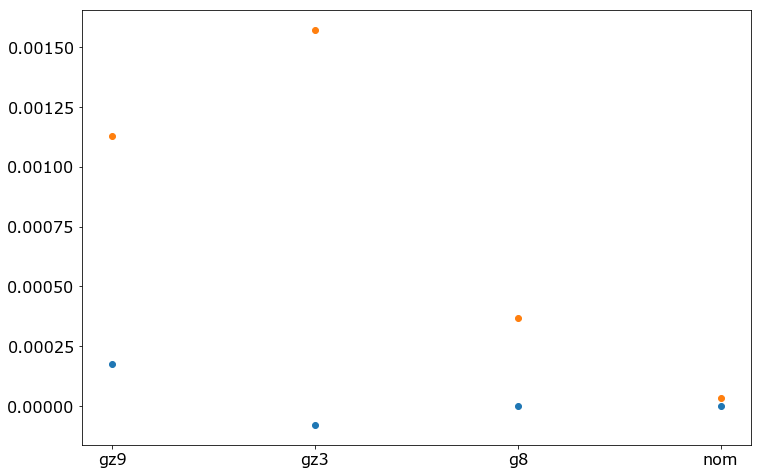

In [88]:
plt.plot(grid_list,mag_means, 'o')
plt.plot(grid_list,mag_std, 'o')